In [18]:
import melanoma as mel
import pathlib

%matplotlib inline
# %matplotlib widget
%load_ext autoreload
%autoreload -p 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
default_path = pathlib.Path.cwd()

dbtype = mel.DatasetType.HAM10000


In [ ]:
utilInstance.generateAvgImages(dbtype)

Reloading 'melanoma.callback'.


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191,label
0,199,156,188,210,165,198,216,176,203,215,...,214,167,191,199,157,175,184,143,167,5
1,115,87,115,180,133,158,200,153,187,215,...,207,167,188,177,128,138,74,51,60,5
2,203,146,164,209,144,153,217,160,181,215,...,211,160,175,199,152,172,177,138,158,5
3,135,96,110,198,141,156,208,148,158,210,...,179,141,157,153,122,138,58,39,46,5
4,204,156,187,232,185,216,236,196,220,217,...,236,189,213,233,182,209,207,175,188,5


((# of images, w*h*c), (# of labels,))
(10015, 192) (10015,)
In the case of test_size=0.1 -> 90% training imgs, 10% test imgs, 90% training labels, 10% test labels
(9013, 192) (1002, 192) (9013,) (1002,)
Split training images into 80:20 train/val sets
# of training images, # of validation images, # of training labels, # of validation labels
(7210, 192) (1803, 192) (7210,) (1803,)
Reshape images into # images, h, w, ch
(7210, 8, 8, 3) (1803, 8, 8, 3) (1002, 8, 8, 3)
Again, reshape labels too
Reshaped labels shape
(7210, 7) (1803, 7) (1002, 7)


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch: 1 loss: 1.0689 accuracy: 0.6606 val_loss: 0.9974 val_accuracy: 0.6705
Epoch: 10 loss: 0.7817 accuracy: 0.7077 val_loss: 0.9378 val_accuracy: 0.6927
Epoch: 20 loss: 0.7032 accuracy: 0.7354 val_loss: 0.8178 val_accuracy: 0.7221

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch: 30 loss: 0.6575 accuracy: 0.7469 val_loss: 0.7675 val_accuracy: 0.7238

Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
57/57 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.7238
Validation: accuracy = 0.723794  ;  loss_v = 0.767452
Test: accuracy = 0.716567  ;  loss = 0.751673


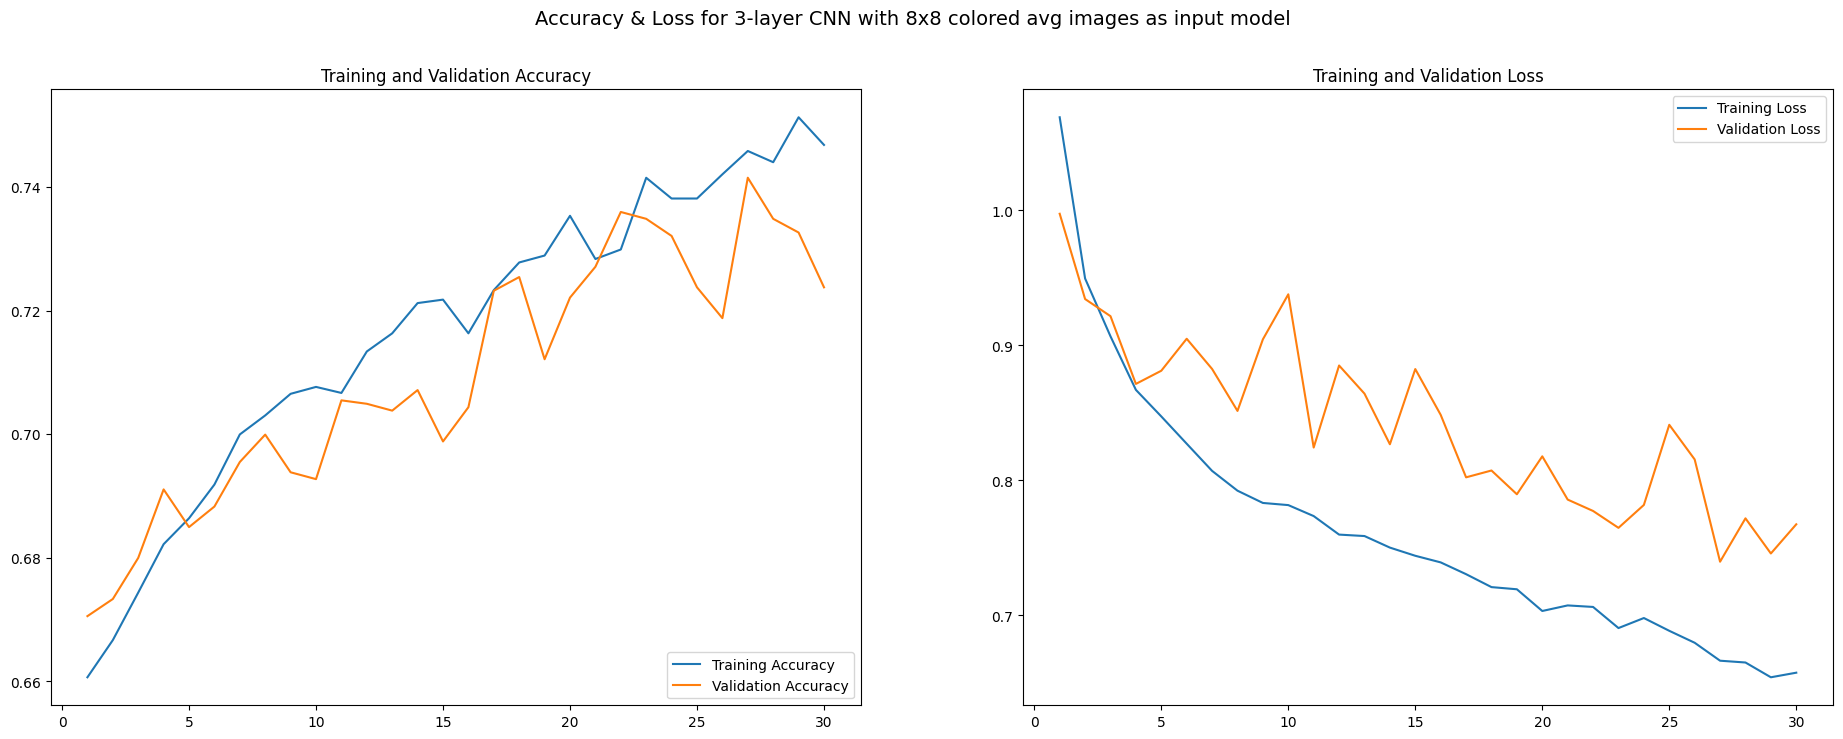

In [23]:
img_size = (8, 8)
utilInstance_8_8_c = mel.Util(default_path, img_size)
data_gen_X_train, data_gen_X_val, X_train, X_test, X_val, y_train, y_test, y_val, num_classes = utilInstance_8_8_c.loadCSV(dbtype)
cnn_8_8_color = mel.CNN(8, 8, None, num_classes)
model_8_8_c, history_8_8_c = cnn_8_8_color.train(data_gen_X_train, data_gen_X_val, X_train, y_train, X_val, y_val)

loss_test_8_8_c, acc_test_8_8_c = model_8_8_c.evaluate(X_test, y_test, verbose=1)
loss_val_8_8_c, acc_val_8_8_c = model_8_8_c.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val_8_8_c, loss_val_8_8_c))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test_8_8_c, loss_test_8_8_c))
# model.save("model.h5")

visualizer = mel.Visualizer()

visualizer.visualize_performance(
    model_name = '3-layer CNN with 8x8 colored avg images as input',
    history = history_8_8_c
)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,5
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,5
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,5
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,5
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,5


((# of images, w*h*c), (# of labels,))
(10015, 2352) (10015,)
In the case of test_size=0.1 -> 90% training imgs, 10% test imgs, 90% training labels, 10% test labels
(9013, 2352) (1002, 2352) (9013,) (1002,)
Split training images into 80:20 train/val sets
# of training images, # of validation images, # of training labels, # of validation labels
(7210, 2352) (1803, 2352) (7210,) (1803,)
Reshape images into # images, h, w, ch
(7210, 28, 28, 3) (1803, 28, 28, 3) (1002, 28, 28, 3)
Again, reshape labels too
Reshaped labels shape
(7210, 7) (1803, 7) (1002, 7)


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch: 1 loss: 0.9570 accuracy: 0.6682 val_loss: 0.8899 val_accuracy: 0.6938
Epoch: 10 loss: 0.6585 accuracy: 0.7610 val_loss: 0.6834 val_accuracy: 0.7510

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch: 20 loss: 0.5646 accuracy: 0.7852 val_loss: 0.6692 val_accuracy: 0.7504

Epoch 00027: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch: 30 loss: 0.5315 accuracy: 0.7969 val_loss: 0.6581 val_accuracy: 0.7549

Epoch 00030: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
57/57 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7549
Validation: accuracy = 0.754853  ;  loss_v = 0.658127
Test: accuracy = 0.725549  ;  loss = 0.690912


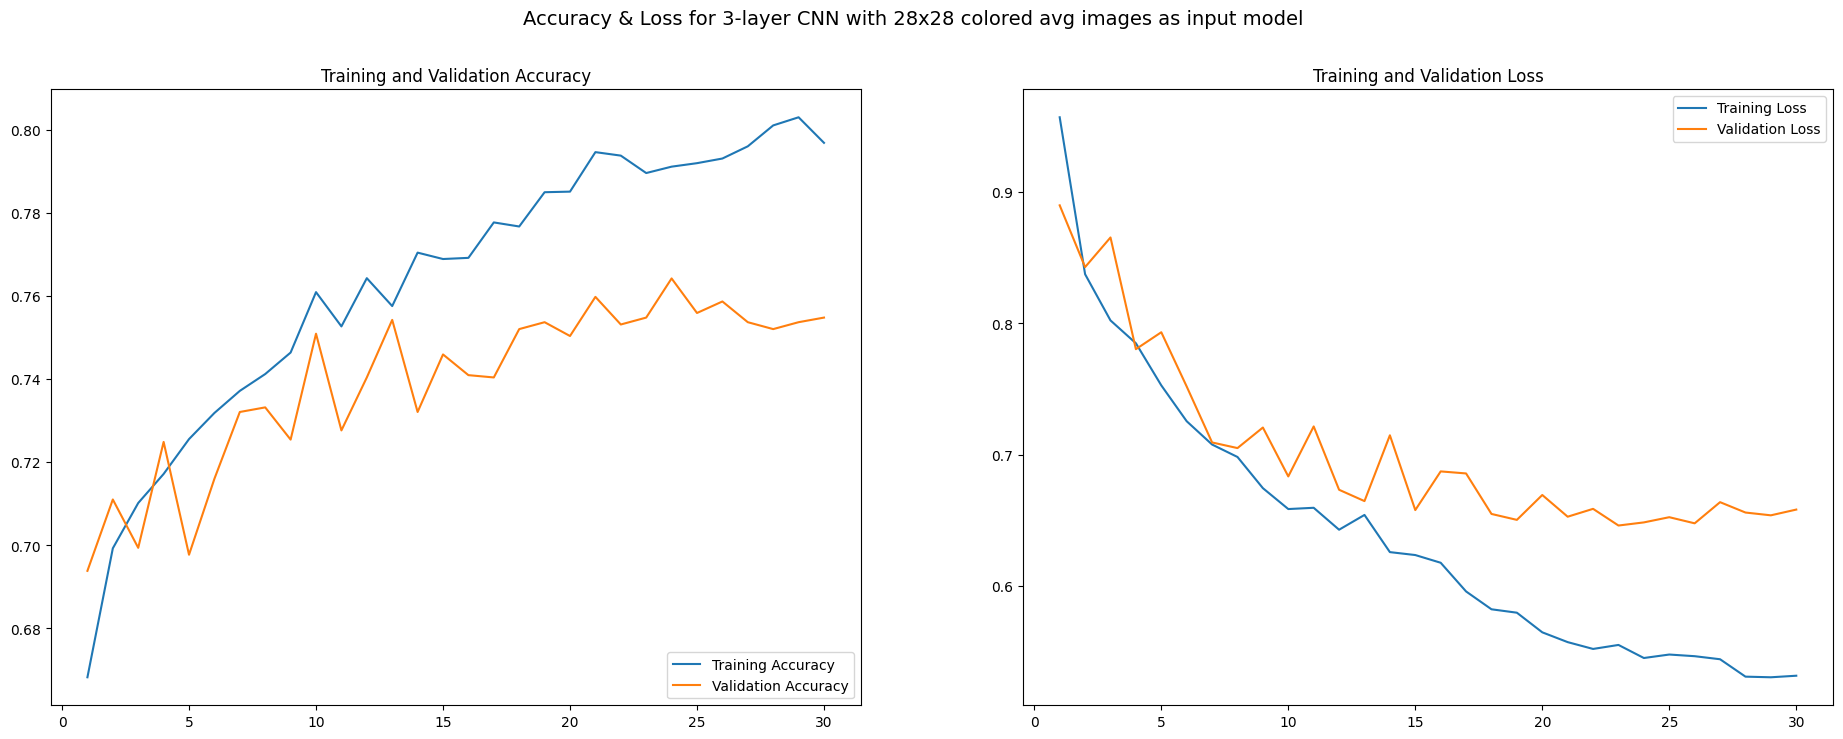

In [24]:
img_size = (28, 28)
utilInstance_28_28_c = mel.Util(default_path, img_size)
data_gen_X_train, data_gen_X_val, X_train, X_test, X_val, y_train, y_test, y_val, num_classes = utilInstance_28_28_c.loadCSV(dbtype)
cnn_28_28_color = mel.CNN(28, 28, None, num_classes)
model_28_28_c, history_28_28_c = cnn_28_28_color.train(data_gen_X_train, data_gen_X_val, X_train, y_train, X_val, y_val)

loss_test_28_28_c, acc_test_28_28_c = model_28_28_c.evaluate(X_test, y_test, verbose=1)
loss_val_28_28_c, acc_val_28_28_c = model_28_28_c.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val_28_28_c, loss_val_28_28_c))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test_28_28_c, loss_test_28_28_c))
# model.save("model.h5")

visualizer.visualize_performance(
    model_name = '3-layer CNN with 28x28 colored avg images as input',
    history = history_28_28_c
)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel12279,pixel12280,pixel12281,pixel12282,pixel12283,pixel12284,pixel12285,pixel12286,pixel12287,label
0,191,152,194,191,153,195,192,149,192,194,...,185,154,180,186,156,184,182,152,173,5
1,24,13,23,24,14,28,37,24,46,61,...,26,15,29,27,15,28,24,13,25,5
2,185,129,140,192,136,151,198,142,156,198,...,152,120,138,144,113,123,115,81,84,5
3,24,11,19,36,19,30,64,38,50,91,...,27,13,16,25,12,16,24,9,14,5
4,138,94,117,158,113,138,178,133,161,191,...,140,106,118,108,77,92,67,40,55,5


((# of images, w*h*c), (# of labels,))
(10015, 12288) (10015,)
In the case of test_size=0.1 -> 90% training imgs, 10% test imgs, 90% training labels, 10% test labels
(9013, 12288) (1002, 12288) (9013,) (1002,)
Split training images into 80:20 train/val sets
# of training images, # of validation images, # of training labels, # of validation labels
(7210, 12288) (1803, 12288) (7210,) (1803,)
Reshape images into # images, h, w, ch
(7210, 64, 64, 3) (1803, 64, 64, 3) (1002, 64, 64, 3)
Again, reshape labels too
Reshaped labels shape
(7210, 7) (1803, 7) (1002, 7)


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch: 1 loss: 1.0001 accuracy: 0.6597 val_loss: 0.8805 val_accuracy: 0.6961
Epoch: 10 loss: 0.6458 accuracy: 0.7625 val_loss: 0.6743 val_accuracy: 0.7465

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch: 20 loss: 0.5635 accuracy: 0.7914 val_loss: 0.6390 val_accuracy: 0.7621

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch: 30 loss: 0.4921 accuracy: 0.8129 val_loss: 0.6161 val_accuracy: 0.7776
57/57 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7776
Validation: accuracy = 0.777593  ;  loss_v = 0.616127
Test: accuracy = 0.756487  ;  loss = 0.671008


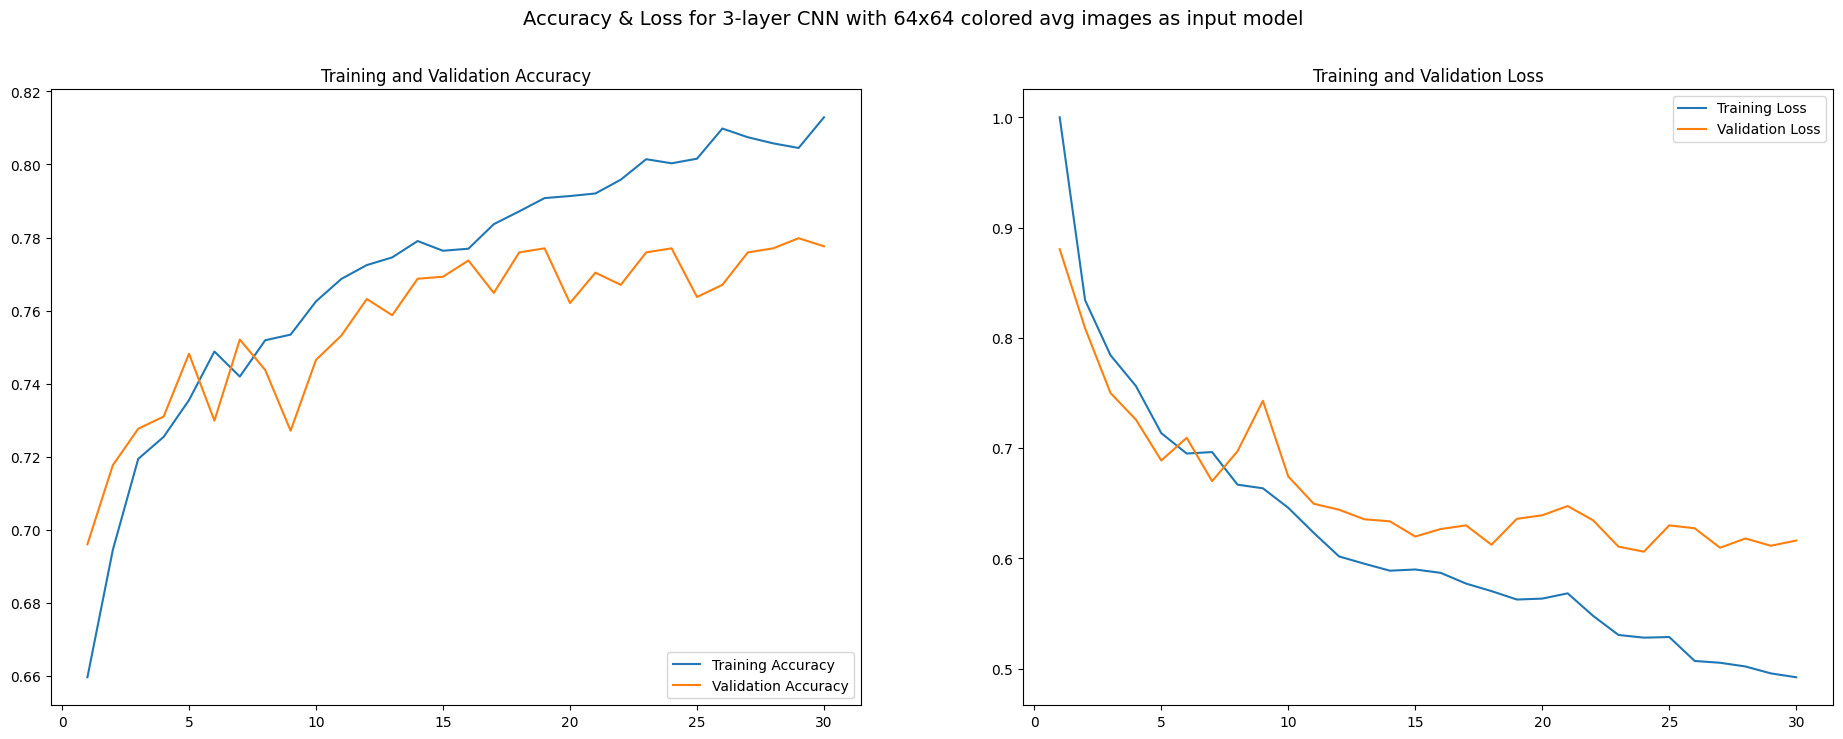

In [25]:
img_size = (64, 64)
utilInstance_64_64_c = mel.Util(default_path, img_size)
data_gen_X_train, data_gen_X_val, X_train, X_test, X_val, y_train, y_test, y_val, num_classes = utilInstance_64_64_c.loadCSV(dbtype)
cnn_64_64_color = mel.CNN(64, 64, None, num_classes)
model_64_64_c, history_64_64_c = cnn_64_64_color.train(data_gen_X_train, data_gen_X_val, X_train, y_train, X_val, y_val)

loss_test_64_64_c, acc_test_64_64_c = model_64_64_c.evaluate(X_test, y_test, verbose=1)
loss_val_64_64_c, acc_val_64_64_c = model_64_64_c.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val_64_64_c, loss_val_64_64_c))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test_64_64_c, loss_test_64_64_c))
# model.save("model.h5")

visualizer.visualize_performance(
    model_name = '3-layer CNN with 64x64 colored avg images as input',
    history = history_64_64_c
)